# Indels types observed in WGS datasets

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact
from utils.utils import df_to_group_counts, get_id83_order
%matplotlib inline

out_dir = "outputs/indel_categories"
os.makedirs(out_dir, exist_ok=True)

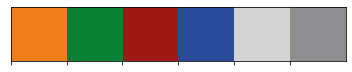

In [2]:
indel_cat_cols = [
    '#F07E19',
    '#088136',
    '#a01915',
    '#2a4b9b',
    '#d5d4d5',
    '#8f8f91'
    ]
sns.palplot(indel_cat_cols)

In [3]:
def count_indel_simple_categories(df, group_by=[]):
    '''
    Return a dataframe of counts per indel category.
    
    Args:
        df: pandas dataframe of indels (as created by 01_variants_to_tables.ipynb)
        
        group_by:
            list of one or more categories to group counts by
    '''
    if group_by:
        return df_to_group_counts(
            df,
            group_by + ['Simple_Categorization'])
    count_df = df.groupby('Simple_Categorization')['Simple_Categorization'].count().to_frame()
    count_df.columns = ['Count']
    count_df.reset_index(inplace=True)
    return count_df


## RPE1 Mutation Accumulation Experiment

RNASEH2A KO (AKO1_4) and RNASEH2B KO (BKO1_4) vs WT RPE1 cells after long term bottleneck culture (Fig 3).

In [4]:
rpe1_indel_df = pd.read_csv("data/rpe1_bottleneck/rpe1_indels.csv")
rpe1_indel_cat_counts = count_indel_simple_categories(
    rpe1_indel_df,
    group_by=['sample_id', 'Status'])
rpe1_indel_cat_counts.to_csv(os.path.join(out_dir,
                                          "rpe1_bottleneck_indel_cat_counts.csv"
                                          ),
                                          index=False)
rpe1_indel_cat_counts

sample_id Status Simple_Categorization  Count
0     AKO1_4     KO         1 bp deletion    174
1     AKO1_4     KO        1 bp insertion    148
2     AKO1_4     KO       2-5 bp deletion     67
3     AKO1_4     KO      2-5 bp insertion      9
4     AKO1_4     KO       > 5 bp deletion     19
5     AKO1_4     KO      > 5 bp insertion      2
6     BKO1_4     KO         1 bp deletion    133
7     BKO1_4     KO        1 bp insertion    123
8     BKO1_4     KO       2-5 bp deletion     52
9     BKO1_4     KO      2-5 bp insertion     16
10    BKO1_4     KO       > 5 bp deletion     20
11    BKO1_4     KO      > 5 bp insertion      2
12     WT1_1     WT         1 bp deletion    157
13     WT1_1     WT        1 bp insertion    146
14     WT1_1     WT       2-5 bp deletion      8
15     WT1_1     WT      2-5 bp insertion     23
16     WT1_1     WT       > 5 bp deletion     15
17     WT1_1     WT      > 5 bp insertion      2
18     WT1_2     WT         1 bp deletion    161
19     WT1_2     WT        1 bp insertion    143
20     WT1_2     WT       2-5 bp deletion     10
21     WT1_2     WT      2-5 bp insertion     13
22     WT1_2     WT       > 5 bp deletion      4
23     WT1_2     WT      > 5 bp insertion      2
24     WT2_4     WT         1 bp deletion    117
25     WT2_4     WT        1 bp insertion    108
26     WT2_4     WT       2-5 bp deletion      6
27     WT2_4     WT      2-5 bp insertion     10
28     WT2_4     WT       > 5 bp deletion      7
29     WT2_4     WT      > 5 bp insertion      1

Text(0.5, 1.0, 'RPE1 indel accumulation')

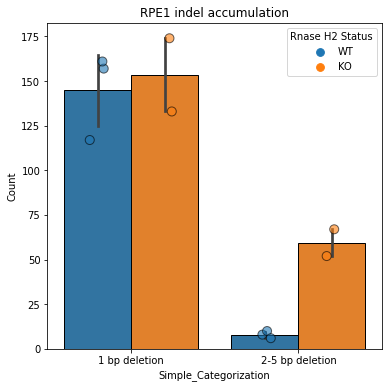

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(ax=ax,
            data=rpe1_indel_cat_counts,
            x='Simple_Categorization',
            order=['1 bp deletion', '2-5 bp deletion'],
            hue='Status',
            hue_order=['WT', 'KO'],
            y='Count',
            edgecolor='k',
            ci='sd')
sns.stripplot(ax=ax,
              data=rpe1_indel_cat_counts,
              x='Simple_Categorization',
              y='Count',
              dodge=True,
              order=['1 bp deletion', '2-5 bp deletion'],
              hue='Status',
              hue_order=['WT', 'KO'],
              edgecolor='k',
              linewidth=1,
              alpha=0.6,
              size=9)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:int(len(handles)/2)],
           labels[:int(len(labels)/2)],
           title='Rnase H2 Status',
           loc='upper right')
plt.title("RPE1 indel accumulation")

Text(0.5, 1.0, 'RPE1 indel accumulation')

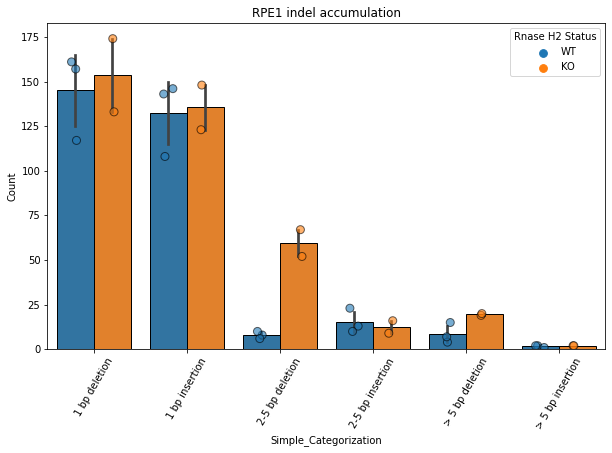

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(ax=ax,
            data=rpe1_indel_cat_counts,
            x='Simple_Categorization',
            hue='Status',
            hue_order=['WT', 'KO'],
            y='Count',
            edgecolor='k',
            ci='sd')
sns.stripplot(ax=ax,
              data=rpe1_indel_cat_counts,
              x='Simple_Categorization',
              y='Count',
              dodge=True,
              hue='Status',
              hue_order=['WT', 'KO'],
              edgecolor='k',
              linewidth=1,
              alpha=0.6,
              size=8)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:int(len(handles)/2)],
           labels[:int(len(labels)/2)],
           title='Rnase H2 Status',
           loc='upper right')
plt.xticks(rotation=60)
plt.title("RPE1 indel accumulation")

Text(0.5, 1.0, 'RPE1 Rnase H2 KO indel accumulation')

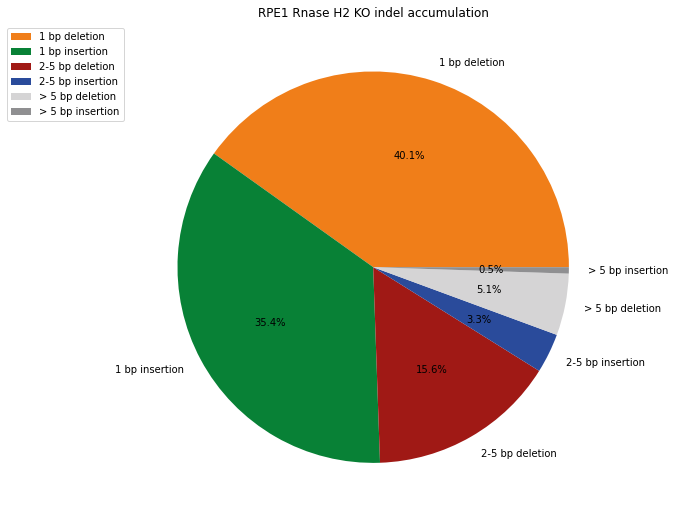

In [7]:
rpe1_ko_cats = rpe1_indel_cat_counts[rpe1_indel_cat_counts.Status == 'KO'].groupby(
    ['Simple_Categorization']).sum()
rpe1_ko_cats.reset_index(inplace=True)
rpe1_ko_cats.sort_values(by=['Simple_Categorization'], inplace=True)
plt.figure(figsize=(9,9))
pie = plt.pie(rpe1_ko_cats.Count,
              autopct='%1.1f%%',
              colors=indel_cat_cols,
              labels=rpe1_ko_cats.Simple_Categorization)
plt.legend(bbox_to_anchor=(0.0, 1.0))
plt.title("RPE1 Rnase H2 KO indel accumulation")

## Generate ID83 matrices for KO - WT indel counts

### Genomewide

In [8]:
id83_counts = df_to_group_counts(rpe1_indel_df,
                                 ['cosmic_class', 'sample_id'])
# create missing strain_type/ID83_class rows
index = pd.MultiIndex.from_product([id83_counts.sample_id.unique(),
                                    get_id83_order()])
id83_counts = id83_counts.set_index(
    ['sample_id', 'cosmic_class']).reindex(index, fill_value=0).reset_index()
id83_counts.columns = ['sample_id', 'MutationType', 'Count']
id83_counts

sample_id MutationType  Count
0      AKO1_4    1:Del:C:0   13.0
1      AKO1_4    1:Del:C:1    6.0
2      AKO1_4    1:Del:C:2    0.0
3      AKO1_4    1:Del:C:3    2.0
4      AKO1_4    1:Del:C:4    1.0
..        ...          ...    ...
410     WT2_4    5:Del:M:1    2.0
411     WT2_4    5:Del:M:2    2.0
412     WT2_4    5:Del:M:3    1.0
413     WT2_4    5:Del:M:4    0.0
414     WT2_4    5:Del:M:5    1.0

[415 rows x 3 columns]

In [9]:
id83_order = get_id83_order()
id83_pivot = id83_counts.pivot_table(columns=['sample_id'], values=['Count'], index='MutationType')
id83_pivot = id83_pivot.reset_index()
id83_pivot.columns = ['MutationType', 'AKO1_4',	'BKO1_4', 'WT1_1', 'WT1_2', 'WT2_4']
id83_pivot['mt_order'] = id83_pivot.MutationType.apply(id83_order.index)
id83_pivot.sort_values(by='mt_order', inplace=True)
id83_pivot.drop('mt_order', axis=1, inplace=True)
id83_pivot.to_csv("data/rpe1_bottleneck/rpe1_ko_id83.genome.all",
                  sep='\t',
                  index=False)
id83_pivot

MutationType  AKO1_4  BKO1_4  WT1_1  WT1_2  WT2_4
0     1:Del:C:0    13.0     6.0    9.0    8.0    6.0
1     1:Del:C:1     6.0     2.0    2.0    1.0    3.0
2     1:Del:C:2     0.0     2.0    0.0    2.0    1.0
3     1:Del:C:3     2.0     0.0    1.0    1.0    2.0
4     1:Del:C:4     1.0     0.0    1.0    0.0    0.0
..          ...     ...     ...    ...    ...    ...
66    5:Del:M:1     4.0     4.0    2.0    0.0    2.0
67    5:Del:M:2     5.0     5.0    6.0    1.0    2.0
68    5:Del:M:3     3.0     0.0    5.0    0.0    1.0
69    5:Del:M:4     1.0     2.0    1.0    1.0    0.0
70    5:Del:M:5     0.0     1.0    0.0    0.0    1.0

[83 rows x 6 columns]

In [10]:
id83_counts['Status'] = id83_counts.sample_id.apply(
    lambda x: 'KO' if 'KO' in x else 'WT')
id83_counts

sample_id MutationType  Count Status
0      AKO1_4    1:Del:C:0   13.0     KO
1      AKO1_4    1:Del:C:1    6.0     KO
2      AKO1_4    1:Del:C:2    0.0     KO
3      AKO1_4    1:Del:C:3    2.0     KO
4      AKO1_4    1:Del:C:4    1.0     KO
..        ...          ...    ...    ...
410     WT2_4    5:Del:M:1    2.0     WT
411     WT2_4    5:Del:M:2    2.0     WT
412     WT2_4    5:Del:M:3    1.0     WT
413     WT2_4    5:Del:M:4    0.0     WT
414     WT2_4    5:Del:M:5    1.0     WT

[415 rows x 4 columns]

In [11]:
id83_status_means = id83_counts.groupby(
    ['MutationType', 'Status'])['Count'].mean().to_frame().reset_index()
id83_status_means

MutationType Status     Count
0      1:Del:C:0     KO  9.500000
1      1:Del:C:0     WT  7.666667
2      1:Del:C:1     KO  4.000000
3      1:Del:C:1     WT  2.000000
4      1:Del:C:2     KO  1.000000
..           ...    ...       ...
161    5:Ins:R:3     WT  0.000000
162    5:Ins:R:4     KO  0.000000
163    5:Ins:R:4     WT  0.000000
164    5:Ins:R:5     KO  0.000000
165    5:Ins:R:5     WT  0.333333

[166 rows x 3 columns]

In [12]:
sum(id83_status_means[id83_status_means.Status == 'KO'].MutationType.values ==
    id83_status_means[id83_status_means.Status == 'WT'].MutationType.values)

83

In [13]:
subtract = (id83_status_means[id83_status_means.Status == 'KO'].Count.values -
            id83_status_means[id83_status_means.Status == 'WT'].Count.values)
id83_subtract = pd.DataFrame()
id83_subtract['MutationType'] = id83_status_means[id83_status_means.Status == 'KO'].MutationType
id83_subtract['KO'] = subtract.clip(min=0)
id83_subtract['mt_order'] = id83_subtract.MutationType.apply(id83_order.index)
id83_subtract.sort_values(by='mt_order', inplace=True)
id83_subtract.drop('mt_order', axis=1, inplace=True)
id83_subtract.to_csv("data/rpe1_bottleneck/rpe1_ko_id83_subtract.genome.all",
                     sep='\t',
                     index=False)
id83_subtract

MutationType        KO
0      1:Del:C:0  1.833333
2      1:Del:C:1  2.000000
4      1:Del:C:2  0.000000
6      1:Del:C:3  0.000000
8      1:Del:C:4  0.166667
..           ...       ...
132    5:Del:M:1  2.666667
134    5:Del:M:2  2.000000
136    5:Del:M:3  0.000000
138    5:Del:M:4  0.833333
140    5:Del:M:5  0.166667

[83 rows x 2 columns]

### Transcribed vs non-transcribed

In [14]:
id83_counts = df_to_group_counts(rpe1_indel_df, ['cosmic_class',
                                                 'transcribed',
                                                 'sample_id'])
# create missing strain_type/ID83_class rows
index = pd.MultiIndex.from_product([id83_counts.sample_id.unique(),
                                    id83_counts.transcribed.unique(),
                                    get_id83_order()])
id83_counts = id83_counts.set_index(
    ['sample_id', 'transcribed', 'cosmic_class']).reindex(index,
                                                       fill_value=0).reset_index()
id83_counts.columns = ['sample_id', 'Transcribed', 'MutationType', 'Count']
id83_counts

sample_id  Transcribed MutationType  Count
0      AKO1_4        False    1:Del:C:0    4.0
1      AKO1_4        False    1:Del:C:1    4.0
2      AKO1_4        False    1:Del:C:2    0.0
3      AKO1_4        False    1:Del:C:3    1.0
4      AKO1_4        False    1:Del:C:4    0.0
..        ...          ...          ...    ...
825     WT2_4         True    5:Del:M:1    2.0
826     WT2_4         True    5:Del:M:2    1.0
827     WT2_4         True    5:Del:M:3    0.0
828     WT2_4         True    5:Del:M:4    0.0
829     WT2_4         True    5:Del:M:5    1.0

[830 rows x 4 columns]

In [15]:
for trns, lbl in zip([True, False], ['transcribed', 'untranscribed']):
    tmp_df = id83_counts[id83_counts.Transcribed == trns]
    id83_pivot = tmp_df.pivot_table(columns=['sample_id'], values=['Count'], index='MutationType')
    id83_pivot = id83_pivot.reset_index()
    id83_pivot.columns = ['MutationType', 'AKO1_4',	'BKO1_4', 'WT1_1', 'WT1_2', 'WT2_4']
    id83_pivot['mt_order'] = id83_pivot.MutationType.apply(id83_order.index)
    id83_pivot.sort_values(by='mt_order', inplace=True)
    id83_pivot.drop('mt_order', axis=1, inplace=True)
    id83_pivot.to_csv("data/rpe1_bottleneck/rpe1_ko_id83.{}.all".format(lbl),
                      sep='\t',
                      index=False)
id83_pivot

MutationType  AKO1_4  BKO1_4  WT1_1  WT1_2  WT2_4
0     1:Del:C:0     4.0     1.0    7.0    4.0    3.0
1     1:Del:C:1     4.0     0.0    1.0    0.0    1.0
2     1:Del:C:2     0.0     0.0    0.0    0.0    0.0
3     1:Del:C:3     1.0     0.0    1.0    0.0    0.0
4     1:Del:C:4     0.0     0.0    1.0    0.0    0.0
..          ...     ...     ...    ...    ...    ...
66    5:Del:M:1     1.0     1.0    1.0    0.0    0.0
67    5:Del:M:2     2.0     1.0    1.0    0.0    1.0
68    5:Del:M:3     2.0     0.0    1.0    0.0    1.0
69    5:Del:M:4     1.0     2.0    1.0    0.0    0.0
70    5:Del:M:5     0.0     0.0    0.0    0.0    0.0

[83 rows x 6 columns]

In [16]:
id83_counts['Status'] = id83_counts.sample_id.apply(
    lambda x: 'KO' if 'KO' in x else 'WT')
id83_status_means = id83_counts.groupby(
    ['MutationType', 'Transcribed', 'Status'])['Count'].mean().to_frame().reset_index()
id83_status_means

MutationType  Transcribed Status     Count
0      1:Del:C:0        False     KO  2.500000
1      1:Del:C:0        False     WT  4.666667
2      1:Del:C:0         True     KO  7.000000
3      1:Del:C:0         True     WT  3.000000
4      1:Del:C:1        False     KO  2.000000
..           ...          ...    ...       ...
327    5:Ins:R:4         True     WT  0.000000
328    5:Ins:R:5        False     KO  0.000000
329    5:Ins:R:5        False     WT  0.000000
330    5:Ins:R:5         True     KO  0.000000
331    5:Ins:R:5         True     WT  0.333333

[332 rows x 4 columns]

In [17]:
for trns, lbl in zip([True, False], ['transcribed', 'untranscribed']):
    tmp_df = id83_status_means[id83_status_means.Transcribed == trns]
    assert(sum(tmp_df[tmp_df.Status == 'KO'].MutationType.values ==
               tmp_df[tmp_df.Status == 'WT'].MutationType.values) == 83)
    subtract = (tmp_df[tmp_df.Status == 'KO'].Count.values -
                tmp_df[tmp_df.Status == 'WT'].Count.values)
    id83_subtract = pd.DataFrame()
    id83_subtract['MutationType'] = tmp_df[tmp_df.Status == 'KO'].MutationType
    id83_subtract['KO'] = subtract.clip(min=0)
    id83_subtract['mt_order'] = id83_subtract.MutationType.apply(id83_order.index)
    id83_subtract.sort_values(by='mt_order', inplace=True)
    id83_subtract.drop('mt_order', axis=1, inplace=True)
    id83_subtract.to_csv(
        "data/rpe1_bottleneck/rpe1_ko_id83_subtract.{}.all".format(lbl),
        sep='\t',
        index=False)
id83_subtract

MutationType        KO
0      1:Del:C:0  0.000000
4      1:Del:C:1  1.333333
8      1:Del:C:2  0.000000
12     1:Del:C:3  0.166667
16     1:Del:C:4  0.000000
..           ...       ...
264    5:Del:M:1  0.666667
268    5:Del:M:2  0.833333
272    5:Del:M:3  0.333333
276    5:Del:M:4  1.166667
280    5:Del:M:5  0.000000

[83 rows x 2 columns]

## RNase H2 Null Mouse Tumours



In [18]:
ms_indel_df = pd.read_csv(
    "data/mouse_rnaseh2null_tumours/mouse_tumour_indels.csv")
ms_indel_cat_counts = count_indel_simple_categories(ms_indel_df)
ms_indel_cat_counts.to_csv(os.path.join(out_dir,
                                        "mouse_tumour_indel_cat_counts.csv"),
                           index=False)
ms_indel_cat_counts

Simple_Categorization  Count
0         1 bp deletion    486
1        1 bp insertion    123
2       2-5 bp deletion    279
3      2-5 bp insertion     36
4       > 5 bp deletion     59
5      > 5 bp insertion      6

Text(0.5, 1.0, 'Mouse RNase H2 Null Tumour Somatic Indels')

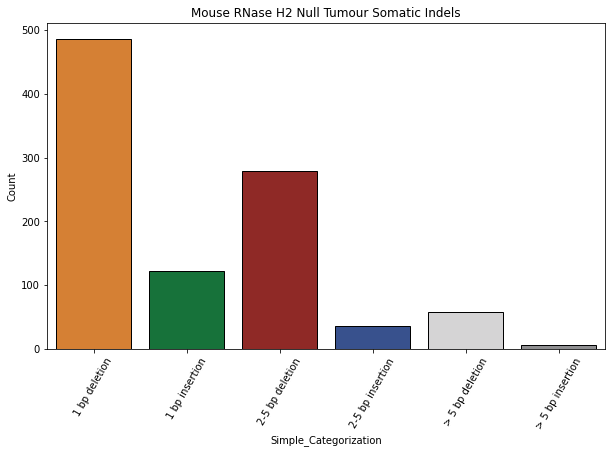

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(ax=ax,
            data=ms_indel_cat_counts,
            x='Simple_Categorization',
            y='Count',
            palette=indel_cat_cols,
            edgecolor='k',
            ci='sd')
plt.xticks(rotation=60)
plt.title("Mouse RNase H2 Null Tumour Somatic Indels")

Text(0.5, 1.0, 'Mouse RNase H2 Null Tumour Somatic Indels')

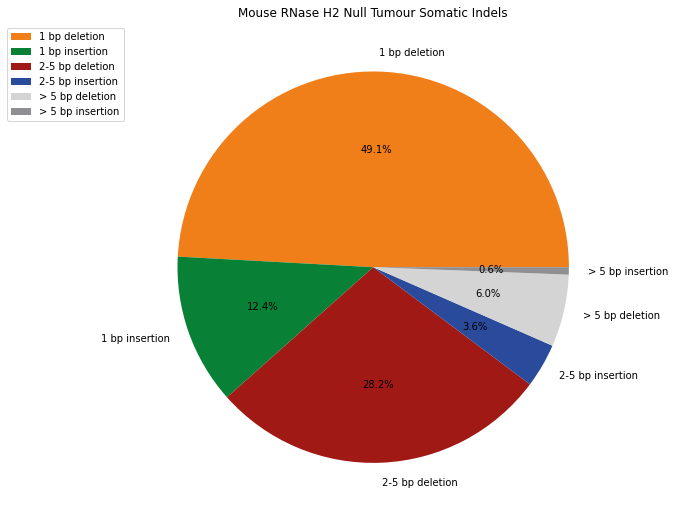

In [20]:
plt.figure(figsize=(9,9))
pie = plt.pie(ms_indel_cat_counts.Count,
        autopct='%1.1f%%',
        colors=indel_cat_cols,
        labels=ms_indel_cat_counts.Simple_Categorization)
plt.legend(bbox_to_anchor=(0.0, 1.0))
plt.title("Mouse RNase H2 Null Tumour Somatic Indels")

## Gene4Denovo



In [21]:
g4d_indel_df = pd.read_csv("data/gene4denovo/gene4denovo_indels.csv")
g4d_indel_cat_counts = count_indel_simple_categories(g4d_indel_df)
g4d_indel_cat_counts.to_csv(os.path.join(out_dir,
                                         "gene4denovo_indel_cat_counts.csv"),
                            index=False)
g4d_indel_cat_counts

Simple_Categorization  Count
0         1 bp deletion   9294
1        1 bp insertion   6387
2       2-5 bp deletion  13456
3      2-5 bp insertion   5280
4       > 5 bp deletion   3492
5      > 5 bp insertion   3025

Text(0.5, 1.0, 'Gene4Denovo Indels')

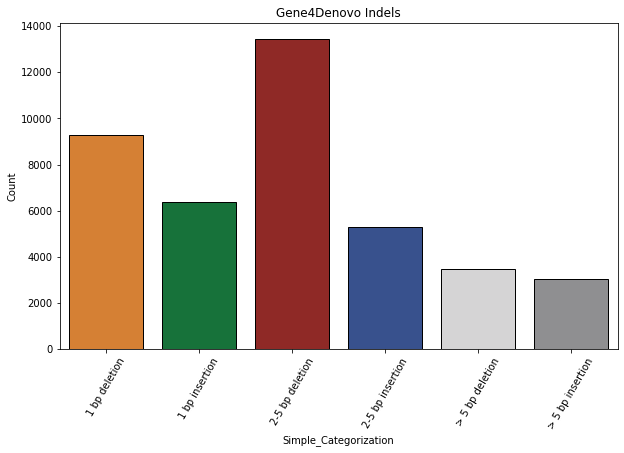

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(ax=ax,
            data=g4d_indel_cat_counts,
            x='Simple_Categorization',
            y='Count',
            palette=indel_cat_cols,
            edgecolor='k',
            ci='sd')
plt.xticks(rotation=60)
plt.title("Gene4Denovo Indels")

Text(0.5, 1.0, 'Gene4Denovo Indels')

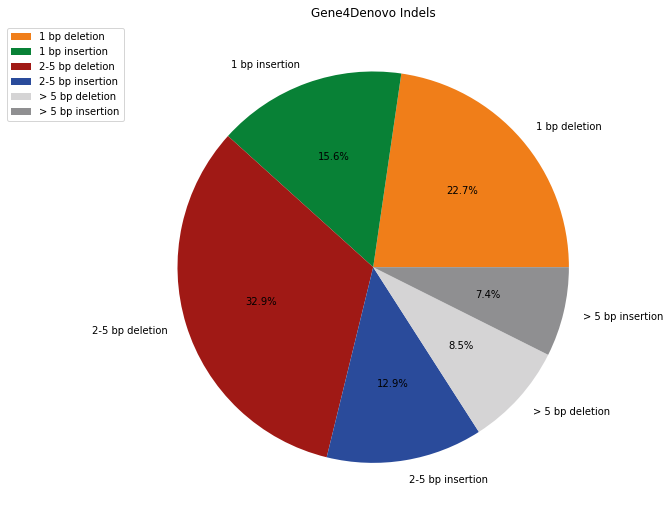

In [23]:
plt.figure(figsize=(9,9))
pie = plt.pie(g4d_indel_cat_counts.Count,
        autopct='%1.1f%%',
        colors=indel_cat_cols,
        labels=g4d_indel_cat_counts.Simple_Categorization)
plt.legend(bbox_to_anchor=(0.0, 1.0))
plt.title("Gene4Denovo Indels")